In [347]:
#Check the present working directory
import os
os.getcwd()
#

'/home/faizan/projects&datasets'

In [348]:
cd /home/faizan/projects&datasets

/home/faizan/projects&datasets


In [349]:
pwd

'/home/faizan/projects&datasets'

In [350]:
ls

colors.csv  multicolor_img.jpg


In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

In [352]:
df=pd.read_csv('colors.csv', names=['color','color_name','hex_value','R','G','B'])
df.head(5)

,color,color_name,hex_value,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [353]:
df.columns

Index(['color', 'color_name', 'hex_value', 'R', 'G', 'B'], dtype='object')

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   color       865 non-null    object
 1   color_name  865 non-null    object
 2   hex_value   865 non-null    object
 3   R           865 non-null    int64 
 4   G           865 non-null    int64 
 5   B           865 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 40.7+ KB


In [355]:
df.shape

(865, 6)

In [356]:
len(df)

865

In [357]:
df.dtypes

color         object
color_name    object
hex_value     object
R              int64
G              int64
B              int64
dtype: object

In [358]:
df.isnull().any()

color         False
color_name    False
hex_value     False
R             False
G             False
B             False
dtype: bool

In [359]:
#I have downloaded a multicolor immage from internet
image=cv.imread('multicolor_img.jpg')
image#prints an array of number i.e an array of pixels

array([[[  2, 229, 202],
        [  2, 229, 202],
        [  0, 228, 201],
        ...,
        [  0, 234, 197],
        [  7, 231, 196],
        [ 47, 241, 211]],

       [[  4, 232, 203],
        [  3, 231, 202],
        [  0, 230, 201],
        ...,
        [  0, 236, 199],
        [ 12, 233, 199],
        [ 49, 243, 213]],

       [[  3, 233, 197],
        [  2, 231, 198],
        [  2, 231, 198],
        ...,
        [  2, 236, 200],
        [ 12, 233, 199],
        [ 52, 244, 214]],

       ...,

       [[186,  96,   8],
        [185,  96,   8],
        [187,  97,   9],
        ...,
        [202, 188,  28],
        [197, 182,  32],
        [216, 203,  71]],

       [[203, 138,  77],
        [205, 140,  79],
        [205, 140,  79],
        ...,
        [219, 209,  91],
        [214, 203,  92],
        [231, 218, 126]],

       [[255, 255, 235],
        [255, 255, 238],
        [255, 255, 237],
        ...,
        [255, 255, 221],
        [255, 255, 220],
        [255, 255, 229]]

In [360]:
type(image)

numpy.ndarray

In [361]:
image.dtype

dtype('uint8')

In [362]:
image.shape

(625, 997, 3)

In [363]:
#resizing the immage
image=cv.resize(image,(600,500))
image.shape

(500, 600, 3)

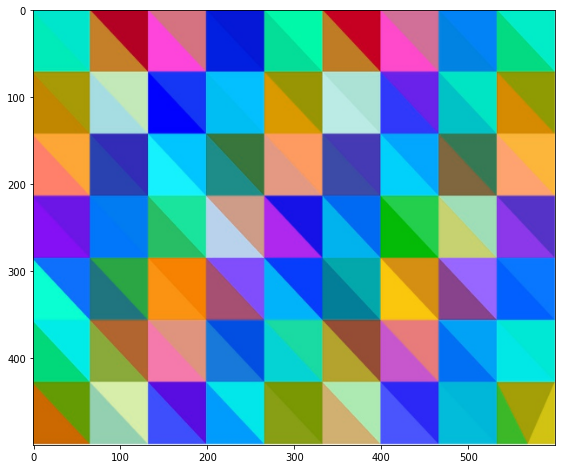

In [364]:
#plotting the immage
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

###### We want to know the color's name when we click any color on the immage

In [365]:
double_clicked=False #Initially we make it False to take actions when it is double clicked
b=g=r=0 #Initially we make these value zero 

In [366]:
#To compare values with dataframe RGB values first we want to get these values
def extract_parameters(event,x,y,param,flags): #By defaul the function called in setMouseCallback have these five parameters.
    #event is doing any thing,x and y are coordinates of immage
    if event == cv.EVENT_LBUTTONDBLCLK: #if Left Button double clicked
        global b,g,r,double_clicked #We made  these variables global we can use them out of the funcyion without returning them in this fn
        
        double_clicked=True #We double clicked so we make it True
            
        print(f'The coordinates of this point is (x,y):{x,y}')#printing the coordinates,we extracted coordinate
        b,g,r = image[y,x] #opencv stores value in bgr format.We can extract these values through this line of code
        print(f'Blue component(B):{b}, Green component (G):{g}, Red component (R):{r}')
        print("-----------------------------------------------------------")
        #print(f"Data type of b,g and r respectivelyis: {type(b)},{type(g)},{type(r)}")
        #type of b,g and r is numpy.uint8 so we will convert into integer because we have to compare it with our dataframe R,G,B values
        b=int(b)
        g=int(g)
        r=int(r)
        #we can check the data type now
        #print(f"Data type of b,g and r respectivelyis: {type(b)},{type(g)},{type(r)}")

In [367]:
df.loc[1] #second Row of data frame(only for example)

color           air_force_blue_usaf
color_name    Air Force Blue (Usaf)
hex_value                   #00308f
R                                 0
G                                48
B                               143
Name: 1, dtype: object

In [368]:
df.loc[1,"R"]# vlaue at 2nd row and column R of dataframe and so on(only for example)
#df.loc[1,"G"]#value at 2nd row and column G
#df.loc[1,"B"]#value at 2nd row and column B

0

In [369]:
#Now we are itrating through dataframe to getnearest value
def color_name(blue,green,red):
    min_val=1000 #We write/initialize a minimum value for comparison(1st time)
    for i in range(len(df)):
        #getting sum of absolute difference of each our color component vlaue with the value store in our dataframe RGB value.
        #So, We will get the name of color from dataframe with minimum absolute difference 
        diff=abs(red-int(df.loc[i,"R"]))+abs(green-int(df.loc[i,"G"]))+abs(blue-int(df.loc[i,"B"]))
        if diff<=min_val:
            min_val=diff
            clr_name=df.loc[i,'color_name']
    return clr_name

In [373]:
#creating a window
cv.namedWindow("img") #window name
cv.setMouseCallback("img",extract_parameters) #We set callback to take action on the immage according to our function named "action"

while True: #The loop will run for ever
    cv.imshow('img',image)#we will pass the name of window and image that we want to display
    if double_clicked==True:
        
        # Starting coordinates are (10, 10) awhich represents top left corner of rectangle
        start_point = (40, 25)
  
        # End coordinates are (620, 50) which represents the bottom right corner of rectangle
        end_point = (590, 60)
  
        # White color in BGR(white rectangle)
        color = (255, 255, 255)
  
        
        image = cv.rectangle(image, start_point, end_point, color, -1)#cv.rectangle() method we are drawing a rectangle with blue borders of thickes 2 pixels
        cv.rectangle(image,(400,30),(542,53),(b,g,r),-1)#We draw this small rectangle inside white rectangleto show the detected color
        #another benefit of drawing rectangle is that it cleans older text
        text=color_name(b,g,r)
        
        """Parameters for "cv.putText" method  """
        # org(staring point/coordinates)
        org = (50, 50)
        #font
        font=2
        # fontScale
        fontScale = 1
        # Black color in BGR
        color = (0, 0, 0)
        # Line thickness of 2 pixels
        thickness = 2
        
        cv.putText(image,text,org, font,fontScale, color, thickness, cv.LINE_AA) #openc method.Check the method's parameter for batter understanding
        if r+g+b>=500:#color is too lite
            cv.putText(image,text,org, font,fontScale, (0,0,0), thickness, cv.LINE_AA)#mentions black color
            
    if cv.waitKey(20) & 0xFF == 27:# if for 20 seconds nothing happens and we press escape key than loop will break 
        break
cv.destroyAllWindows()#the window will get destroy after cross(clicking cross button in last line)

#cv.waitKey(0) mean that until we don't press any key on keyboard the window will not close.(if we cross window it will keep running iin background)


The coordinates of this point is (x,y):(243, 381)
Blue component(B):2, Green component (G):79, Red component (R):226
-----------------------------------------------------------
The coordinates of this point is (x,y):(383, 443)
Blue component(B):173, Green component (G):234, Red component (R):178
-----------------------------------------------------------
